# **Lecture 4 Assignment Answers**

---

**Name:** Von Rayn A. Malingin  
**Course and Year:** BSCS - 1

---


# Assignment
---
Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

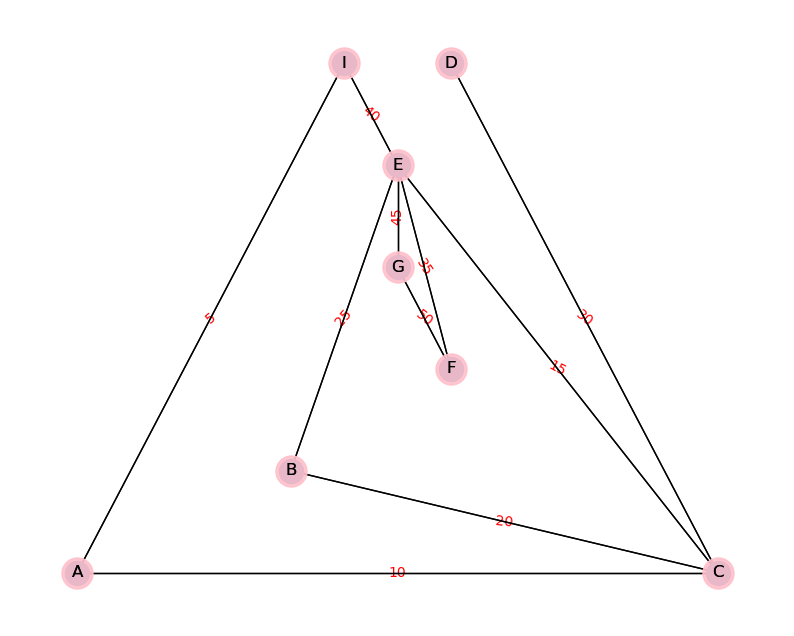

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

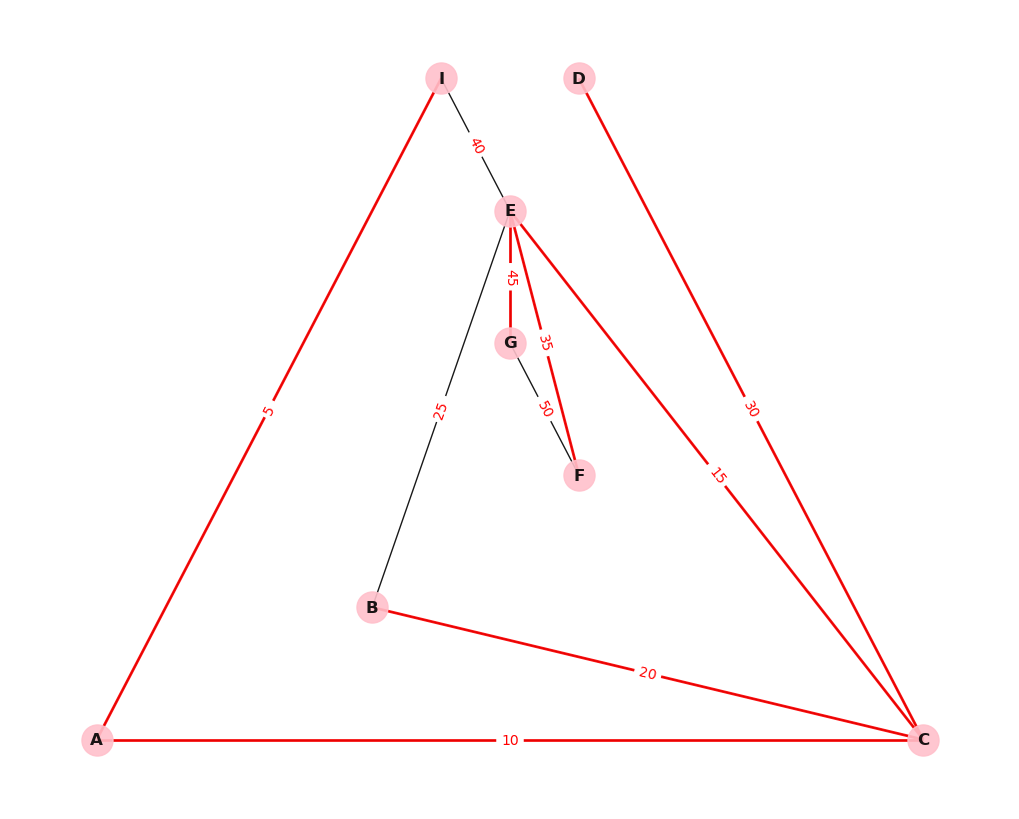

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])

# Add edges with weights
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30),
            ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]

# Add edges to the graph with weights
G.add_weighted_edges_from(edgelist)

T = nx.minimum_spanning_tree(G)

plt.figure(figsize=(10, 8))

nx.draw(G, pos=nx.planar_layout(G), with_labels=True, node_color='pink', node_size=500, font_size=12, font_weight='bold', edge_color='black', width=1, alpha=0.9)

nx.draw_networkx_edges(T, pos=nx.planar_layout(G), edge_color='red', width=2, alpha=0.9)

labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=nx.planar_layout(G), edge_labels=labels, font_color='red')

plt.show()


$\textbf{Kruskal's Algorithm}$

\begin{array}{|c|c|c|}
\hline
\text{Step} & \text{Edge}  & \text{Weight} \\
\hline
1 & A \rightarrow I &5 \\
2 & A \rightarrow C &10 \\
3 & C \rightarrow E &15 \\
3 & C \rightarrow B &20 \\
4 & C \rightarrow D &30 \\
5 & E \rightarrow F &35 \\
6 & E \rightarrow G &45 \\
\hline
\end{array}

In Kruskal's Algorithm it focuses on the the minimum weight while not creating a circuit. As shown in the table above using Kruskal's Algorithm we begin in the vertix A where it is connected with the least weighted edge which is:
- $A \rightarrow I= 5$, then continue to find the least weighted edge 
- $A \rightarrow C= 10$
- $C \rightarrow E= 15$
- $C \rightarrow B= 20$, Then here we encounter the next least weight $B \rightarrow E= 25$, however connecting this will result to a circuit and we already visited  E earlier which is $C \rightarrow E= 15$, So we directly list go to the next least weighted edge, 
- $C \rightarrow D= 30$ 
- $E \rightarrow F= 35$, We will also not list $E \rightarrow I= 40$ since it will create a circuit so we go to the next least weighted edge
-  $E \rightarrow G= 45$

$\textbf{Prim's Algorithm}$

in Prim's Algorithm we can still refer to the graph that is presented above since Prim's and Krusgals algorithm will result into the same tree if there is no 2 or more edges with the same weight. 

In starting Prim's algorithm we can start with any random Vertix, So I will start first with vertix A since I also started with vertix A in Krusgal's Algorithm. 

\begin{array}{|c|c|c|}
\hline
\text{Step} & \text{Edge}  & \text{Weight} \\
\hline
1 & A  & - \\
2 & A \rightarrow I &5 \\
3 & A \rightarrow C &10 \\
4 & C \rightarrow E &15 \\
5 & C \rightarrow B &20 \\
6 & C \rightarrow D &30 \\
7 & E \rightarrow F &35 \\
8 & E \rightarrow G &45 \\
\hline
\end{array}

- Prim's algorithm expands outward connecting each of the edges and vertices with the minimum weight until all the vertices are visited. So we start with Vertix $A$ that is connected with two degrees with the weight $A \rightarrow I = 5$ and $A \rightarrow C = 10$ since $A \rightarrow I = 5$  is the lower we list it as the first edge.


- then now the connected vertices are $I \rightarrow E = 40$ and $A \rightarrow C = 10$ and then we list the lower one which is $A \rightarrow C = 10$.


- now the connected vertices are  $I \rightarrow E = 40$, $C \rightarrow B = 20$, $C \rightarrow E = 15$, and $C \rightarrow D = 30$ then we list the lowest which is $C \rightarrow E = 15$ and since $E$ is already visited we wont consider $I \rightarrow E = 40$ anymore since connecting this would result to a circuit.


- Now the connected edges available are $C \rightarrow B = 20$,$C \rightarrow D = 30$, $E \rightarrow G = 45$, and $E \rightarrow F = 35$, and since now all the vertices can be visited using the connected edges of $C$ and $E$ we can list the other edges from least weighted to the most weighted. which consecutively is  $C \rightarrow B = 20$, $C \rightarrow D = 30$, $E \rightarrow F = 35$ and lastly $E \rightarrow G = 45$. 




$\textbf{Djikstraka's Algorithm}$

to visualize Djikstra's Algorithm or to find the shrtest path towards each node we will start by listing all the nodes in a table
\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
A & 0 & - \\
B & \infty & \\
C & \infty & \\
D & \infty & \\
E & \infty & \\
F & \infty & \\
G & \infty & \\
I & \infty & \\
\hline
\end{array}
And we take note the nodes that are visited and unvisited



- Visited Nodes = {  }
- Unvisited Nodes = {A,B,C,D,E,F,G,I}

Then note the vertex that has the same edge with A and calculate it's shortest distance to visit the nodes that are connected to A. In the graph provided I and C are the vertices that share the same edge as A. Also calculate the weight traveled from the previous node. 

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
A & 0 & - \\
B & \infty & \\
C & 10(0 + 10)  & A\\
D & \infty & \\
E & \infty & \\
F & \infty & \\
G & \infty & \\
I & 5(0 + 5) & A\\
\hline
\end{array}

- Visited Nodes = { A }
- Unvisited Nodes = {B,C,D,E,F,G,I}

Then we visit least weighted edge which is $A \rightarrow I = 5$, update the path weight and note the previous node

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
A & 0 & - \\
B & \infty & \\
C & 10(0 + 10)  & A\\
D & \infty & \\
E & 45(0+5+40) & A, I \\
F & \infty & \\
G & \infty & \\
I & 5(0 + 5) & A\\
\hline
\end{array}

- Visited Nodes = { A, I }
- Unvisited Nodes = {B,C,D,E,F,G}

Then we visit next least weighted edge which is $A \rightarrow C = 10$, update the shortest path weight and note the previous node

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
A & 0 & - \\
B & 30(0 + 10 + 20) & A, C \\
C & 10(0 + 10)  & A\\
D & 40(0+10+30) & A, C\\
E & 25(0+5+15) & A, C \\
F & \infty & \\
G & \infty & \\
I & 5(0 + 5) & A\\
\hline
\end{array}
- Visited Nodes = { A, I, C}
- Unvisited Nodes = {B,D,E,F,G}

Then we visit next least weighted edge which is $C \rightarrow E = 20$, update the shortest path weight and note the previous node
\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
A & 0 & - \\
B & 30(0 + 10 + 20) & A, C \\
C & 10(0 + 10)  & A\\
D & 40(0+10+30) & A, C\\
E & 25(0+5+15) & A, C \\
F & 65(0+10+15+35) & A, C, E \\
G & 75(0+10+15+45) & A, C, E\\
I & 5(0 + 5) & A\\
\hline
\end{array}

- Visited Nodes = { A, I, C, E}
- Unvisited Nodes = {B,D,F,G}

Then we visit next least weighted edge which is $C \rightarrow B = 20$, update the shortest path weight and note the previous node, Since B shares the same edge to E, and E is already visited and the edge that has visited E has a lesser weight, we proceed to the next shortest path/least weight however the remaining nodes doesnt have any other nodes that share the same edge and hasnt yet been visited. 

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
A & 0 & - \\
B & 30(0 + 10 + 20) & A, C \\
C & 10(0 + 10)  & A\\
D & 40(0+10+30) & A, C\\
E & 25(0+5+15) & A, C \\
F & 65(0+10+15+35) & A, C, E \\
G & 75(0+10+15+45) & A, C, E\\
I & 5(0 + 5) & A\\
\hline
\end{array}

- Visited Nodes = { A, I, C, E, B, D, F, G}
- Unvisited Nodes = { }

Reference : https://youtu.be/pVfj6mxhdMw?si=H7RfoWw-igXgSFOg

---

Since Djikstraka's Algorithm can start with any vertex in a graph, here are tables that show whats the shortest path starting from other vertex or node otherside from $A$

- Starting from vertex B

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
B & 0 & - \\
A & 30 & B, C\\
C & 20 & B\\
D & 50 & B, C\\
E & 25 & B, C\\
F & 60 & B, C, E\\
G & 70 & B, E\\
I & 35& B, C, A\\
\hline
\end{array}

- Starting from vertex C

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
C & 0 & - \\
A & 10 & C\\
B & 20 & C\\
D & 30 & C\\
E & 15 & C\\
F & 50 & C, E\\
G & 60 & C, E\\
I & 15 & C, A\\
\hline
\end{array}

- Starting from vertex D

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
D & 0 & - \\
A & 40 & D, C\\
B & 50 & D, C\\
C & 30 & D\\
E & 45 & D, C\\
F & 80 & D, C, E\\
G & 90 & D, C, E\\
I & 45 & D, C, A\\
\hline
\end{array}

- Starting from vertex E

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
E & 0 & - \\
A & 25 & E, C\\
B & 25 & E\\
C & 15 & E\\
D & 45 & E, C\\
F & 35 & E\\
G & 45 & E\\
I & 30 & E, C, A\\
\hline
\end{array}

- Starting from vertex F

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
F & 0 & - \\
A & 60 & F, E, C\\
B & 60 & F, E\\
C & 50 & F, E\\
D & 80 & F, E, C\\
E & 35 & F\\
G & 50 & F\\
I & 65 & F, C, A\\
\hline
\end{array}

- Starting from vertex G

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
G & 0 & - \\
A & 70 & G,E,C\\
B & 70 & G,E\\
C & 60 & G, E\\
D & 90 & G, E, C\\
E & 45 & G\\
F & 50 & G\\
I & 75 & G, E, C\\
\hline
\end{array}

- Starting from vertex I

\begin{array}{|c|c|c|}
\hline
\text{Node} & \text{Shortest Distance Weight}  & \text{Previous node(s)} \\
\hline
I & 0 & - \\
A & 5 & I\\
B & 35 & I, A, C\\
C & 15 & I, A\\
D & 45 & I, A, C\\
E & 30 & I, A, C\\
F & 65 & I, A, C, E\\
G & 75 & I, A, C, E\\
\hline
\end{array}